<a href="https://colab.research.google.com/github/zulfiqaralimir/Financial-Econometrics/blob/master/PRINCIPAL_COMPONENT_ANALYSIS_AND_VARIABLE_TRANSFORMATION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## FINANCIAL ECONOMETRICS
MODULE 1 | LESSON 3

---

# **PRINCIPAL COMPONENT ANALYSIS AND VARIABLE TRANSFORMATION**

1.   List item
2.   List item





|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Linear Regression, Correlation, Linear Algebra  |
|**Keywords** | Principal Component Analysis, Dimension Reduction, Standardized Variable, Covariance Matrix, Eigenvector & Eigenvalue, Raw Variables & Transformed Variables, Box and Cox Method |


---

*In the last lesson, we discussed the **multicollinearity issue** in a linear regression model. We proposed some methods to handle multicollinearity. The last one is principal component analysis. In this lesson, we will introduce principal component analysis and discuss how it can help to mitigate multicollinearity issue.*

*We then move to the next topic we brought up in Lesson 1: variable transformation. We will explain why we need to apply variable transformation and how to conduct transformation.*

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.decomposition import PCA

## **1. Principal Component Analysis**

### **1.1 Overview**

Often in a project, we need to handle many variables. For example, there are 500 stocks in the *S&P 500* index. If you are tasked to study this index, it would be **time consuming to investigate each stock**. You need a more efficient method to study the components in this stock index. Among many variables, usually, **some of them can be correlated** and some of them cannot. Correlated variables can cause a multicollinearity issue, as we discussed in the last section. Is there a way to reduce the impact of multicollinearity and also reduce the amount of variables to a manageable level?

**Principal Component Analysis (PCA)** is a statistical technique that can help us tackle the above problems. PCA has the following properties:

1. PCA creates new variables called **principal components** from current variables in the dataset. All principal components are independent from each other.
2. Principal components will preserve as much information as possible in the current dataset. What do we mean by preserving information from a dataset? It means that the new principal components will be able to explain the variation in the dataset.
3. PCA also ranks each principal component's ability to explain the dataset variation. The first principal component has the highest ability to explain the variation of the dataset.

With the above properties from PCA, we can select the first few principal components instead of all variables for analysis. The benefit of using a smaller number of principal components to run analysis is important when there are too many variables to consider in a model. You can choose fewer variables without losing too much information and run the analysis. That's why PCA is also considered a **"dimension reduction"** method. The other great benefit of PCA is that all principal components are **independent**. **Geometrically**, this means that **in the new coordinate system, all components are orthogonal** or perpendicular to each other. **Statistically**, this means they are **uncorrelated**. When principal components are selected to run a regression model, there won't be a multicollinearity issue.

### **1.2 The Basics of Principal Components**

In this section, we are going to take a deeper look at principal components. As discussed in the above section, **PCA creates principal components (new variables) from original variables in a dataset**. A **principal component is a linear function of the original variables**. For example, if we have two variables in a dataset, $\text{Var}_1$ and $\text{Var}_2$, then PCA will transform $\text{Var}_1$ and $\text{Var}_2$ and create the following two principal components:

$$ PC_1 = a_1 \text{Var}_1 + a_2 \text{Var}_2 $$

$$ PC_2 = b_1 \text{Var}_1 + b_2 \text{Var}_2 $$

Since we only have two variables in our example, we can draw two-dimensional graphs to demonstrate the concept.

**Figure 1: Principal Component Analysis Data Transformation Graph**

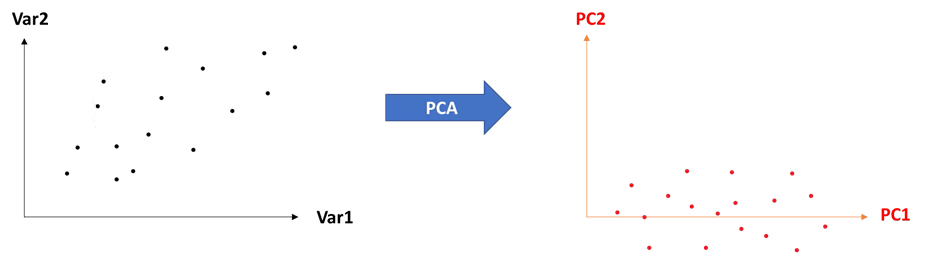



The scatter plot on the left of Figure 1 is the dataset with original variables. Through the transformation of PCA, we can see the new data distribution under principal components on the right of Figure 5. In the left graph, the data points scatter between both $\text{Var}_1$ and $\text{Var}_2$ axes. After the PCA transformation, new data points now mostly gather round the $PC_1$ axis. What does this mean for data analysis? In the original dataset, you need $\text{Var}_1$ and $\text{Var}_2$ to explain the variation of the data points. In the transformed dataset from PCA, **$PC_1$ alone can explain most of the variation** in the dataset. $PC_2$ doesn't provide much help in explaining the variation. We can also see that $PC_1$ and $PC_2$ form a 90-degree angle. We can say that $PC_1$ and $PC_2$ are orthogonal, meaning that $PC_1$ and $PC_2$ are independent. Because $PC_1$ explains most of the data variation, you can use one variable instead of two for analysis. In other words, instead of analyzing the data in two dimensions, you can analyze the data in **one dimension** now. That's why many scientists use PCA as a dimension reduction method for their data analysis work.

### **1.3 Derivation of Principal Components**

From the example in the last section, we know we need to get the transformation matrix
$$
\big(\begin{matrix}
  a_1 & a_2\\
  b_1 & b_2
\end{matrix}\big)
$$

in order to get principal components. In this section, we will outline the steps for how to get the transformation matrix.

#### **1.3.1 Calculate Standardized Dataset**

In the above example, we have $\text{Var}_1$ and $\text{Var}_2$ in our dataset. We need to standardize $\text{Var}_1$ and $\text{Var}_2$. Here is the formula to standardize a variable:

$$ \textit{Standardized Variable} = \frac{  \textit{Original Variable} - \textit{Mean} }{ \textit{Standard Deviation}} $$

All the standardized variables will **have the same scale**, which means mean = $0$ and variance = $1$.

#### **1.3.2 Calculate Covariance Matrix of the Standardized Variables**

**Covariance is a metric to determine the relationship of the two variables**.

$$
\text{Covariance} = \frac{\sum ( x_{i} - \bar{x}  ) ( y_{i} - \bar{y} )} {N}
$$

where $N$ is the number of data points

A positive covariance means that the two variables are moving in the same direction and vice versa.

A covariance matrix is a matrix that contains all pairwise covariances from all variables. From our two-variable example, a covariance matrix for two variables will be a 2 X 2 covariance matrix as follows.

$$
\begin{pmatrix}
    \mathrm{Cov} (Var_1, Var_1 ) & \mathrm{Cov} (Var_2, Var_1 ) \\
    \mathrm{Cov} (Var_1, Var_2) & \mathrm{Cov} ( Var_2, Var_2)
\end{pmatrix}
$$

The diagonal elements of the covariance matrix are also the variance of the variables according to covariance's formula.

#### **1.3.3 Calculate Eigenvectors and Eigenvalues**

Once we obtain the covariance matrix, we can use linear algebra to calculate eigenvectors and eigenvalues from the covariance matrix. What are eigenvectors and eigenvalues? It is best to explain them in our example.

In our two-variable example, $(a_1, a_2)$ and $(b_1, b_2)$ are the two column vectors in our transformation matrix
$$
\big(\begin{matrix}
    a_1 & b_1\\
    a_2 & b_2
\end{matrix}\big)
$$

We know $(a_1, a_2)$ are the coefficients to transform $\text{Var}_1$ and $\text{Var}_2$ to $PC_1$. $(a_1, a_2)$ is the eigenvector for $PC_1$ and $(b_1, b_2)$ is the eigenvector for $PC_2$. The eigenvalue of $PC_1$ is the value that shows the amount of data variance $PC_1$ explains. The eigenvalue of $PC_2$ is the value that shows the amount of data variance $PC_2$ explains. Since $PC_1$ is the first principal component, its eigenvalue is the largest. The way PCA orders principal components is that the principal component with the largest eigenvalue is the first one and the one with the second largest eigenvalue will be the second. **In general, most software doesn't readily provide eigenvalues**. They instead provide a proportion of the total variance explained by the principal component. This proportion is calculated from the eigenvalue of the principal component.

#### **1.3.4 Transform the Data Using PCA**

After getting the transformation matrix
$$
\big(\begin{matrix}
  a_1 & b_1\\
  a_2 & b_2
\end{matrix}\big)$$

we can generate new variables, $PC_1$ and $PC_2$

$$
PC_1 = a_1 \text{Var}_1 + a_2 \text{Var}_2
$$

$$
PC_2 = b_1 \text{Var}_1 + b_2 \text{Var}_2
$$

## **2. Apply Principal Component Analysis to KO's Excess Return Project**

In our *KO* excess return project, we find there is multicollinearity among independent variables. In this section, let's use PCA to see if we could reduce independent variables in the model and mitigate multicollinearity.

**Figure 2: Principal Component Analysis Result Summary for 8 Independent Variables**

In [ ]:
# Download the dataset
data_set = pd.read_csv("fin_data_set.csv")

In [ ]:
# Select 8 variables and standardise
pc = data_set[
    [
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
pca_data = preprocessing.scale(pc)
pca = PCA(n_components=8)
pca.fit(pca_data)

PCA(n_components=8)

In [ ]:
# Get proportions of variance and cumulative proportion of variance
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Proportion of variance,0.417539,0.193287,0.171490,0.108867,0.042000,0.028306,0.026893,0.011619
Cumulative proportion of variance,0.417539,0.610826,0.782316,0.891183,0.933183,0.961489,0.988381,1.000000


Let's look at the proportion of variance and cumulative proportion in the above chart. According to the chart, we can see that the first principal component accounts for 42% of the total variance in the data. The first six principal components explain about 96% of the total variance.

**Next, we would like to see how PCA can help us reduce the number of independent variables in the model**. We know each principal component is a linear function of eight original independent variables. We can choose the original variable **with the highest absolute value of the coefficient in the linear combination** as a proxy of that principal component.

**Figure 3: Coefficients (Loadings) of 8 Principal Components**

In [ ]:
# Coefficients (Loadings) of 8 Principal Components
pc_res = pd.DataFrame(pca.components_.T, index=list(pc.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Dow_Q_EX_R,-0.501013,-0.081975,-0.201491,-0.151476,-0.172552,-0.161302,-0.116793,-0.780570
Pepsi_Q_EX_R,-0.370323,-0.416369,0.215351,0.267349,0.486188,-0.340799,-0.423131,0.200210
REV_Q_R,-0.089143,0.205496,0.723855,0.314653,-0.525310,0.024685,-0.213269,-0.069342
GOOG_Q_EX_R,-0.481635,-0.115076,0.033447,0.219037,0.147889,0.789841,0.241923,0.037978
BAC_Q_EX_R,-0.399072,0.169106,-0.470595,-0.014795,-0.462351,-0.034007,-0.323626,0.520391
WMT_Q_EX_R,-0.116011,-0.659655,0.213805,-0.389464,-0.370728,-0.129019,0.392582,0.214001
GE_Q_EX_R,-0.399918,0.444523,0.093024,0.117590,0.150220,-0.440478,0.622124,0.127903
SBUX_Q_EX_R,-0.198186,0.321096,0.334835,-0.769979,0.249503,0.146820,-0.239618,0.106832


Figure 3 shows the coefficients of eight independent variables for each principal component. The coefficients here can also be called **loadings**.
For $PC_1$, the Dow 30 Index excess return has the highest absolute value of the coefficient. This means that the Dow 30 Index excess return has the largest impact on $PC_1$. Therefore, we can use the Dow 30 Index excess return as a proxy for $PC_1$. Following the same logic, we can use Walmart's excess return as a proxy for $PC_2$. We also know that the first six principal components cover around 96% of the data variation. In this case, we can just choose *Dow 30* Index excess return, Walmart excess return, *KO*'s revenue growth, Starbucks excess return, and Google excess return to run a regression model.

Let's rerun to our revised regression model with fewer independent variables to see the result.

**Figure 4: KO Excess Return Revised Model Result Applying PCA Information**

In [ ]:
# OLS for revised model
model_4 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + WMT_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4.493
Date:                Tue, 03 Jun 2025   Prob (F-statistic):            0.00950
Time:                        19:39:12   Log-Likelihood:                 38.030
No. Observations:                  22   AIC:                            -64.06
Df Residuals:                      16   BIC:                            -57.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0109      0.014     -0.757      0.460      -0.042       0.020
Dow_Q_EX_R      0.6091      0.286      2.133      0.049       0.004       1.214
REV_Q_R         0.1418      0.103      1.380      0.186      -0.076       0.359
GOOG_Q_EX_R     0.1060      0.177      0.600      0.557      -0.268       0.480
WMT_Q_EX_R     -0.0004      0.144     -0.003      0.998      -0.305       0.304
SBUX_Q_EX_R     0.0551      0.117      0.472      0.644      -0.193       0.303
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.031
Skew:                          -0.466   Prob(JB):                        0.597
Kurtosis:                       2.493   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the result in Figure 4, we can see that the *Dow 30* Index **has become significant**, and the **adjusted $R^2$ has improved** from 0.406 at the beginning of this lesson to 0.454. By using the information provided by PCA, we can reduce the impact of multicollinearity among independent variables.

### **2.1 Use Principal Components in a Regression Model**

As you can see from the previous example, **it is hard to integrate principal components directly into a regression model**. If we use a principal component directly as an **independent variable** in a regression model, it will be hard to interpret the meaning of the coefficient estimate. Since principal components are a **linear combination of several financial variables**, they **don't translate directly into a specific financial concept**. However, we can investigate the **loadings** for each principal component and **pick the original variable with the highest absolute value of the loadings as a proxy** for that principal component for regression. This is what we did in the last example. Another way is to also look for a **financial theme** from the loadings of a principal component and **select original variables related to the theme**.

We have also noticed that by selecting the top variables from PCA for data analysis, we **lose some accuracy** in representing complete data variation. We mitigate the multicollinearity from the dataset at the expense of losing some ability to explain the whole data variation. How to choose the **degree of the trade-off** between reducing multicollinearity and losing data explaining accuracy will depend on a **researcher's experience in data analysis**.

## **3. Variable Transformation**

In the previous sections, we looked at the relationships among variables and their impact on linear regression model results. In this section, we turn our focus to the individual variable itself. **In the field of data analysis, oftentimes, the raw data we collect is not ready for analysis. Even if the data is in a form ready for analysis, sometimes, the variables in the dataset don't meet the model assumptions and therefore require some transformation work**. In this section, we will discuss when and how to transform variables as well as choices for transforming variables and how to analyze regression models with transformed variables.

### **3.1 Raw Variables and Transformed Variables**

A **raw variable** is a variable in its original form when the data is collected. The concept is different from raw data. **Raw data is the dataset that comes straight from the data source**. There might be **missing values, outliers, wrong data input**, etc. A researcher often needs to go through certain steps to clean the dataset for use. A **raw variable** is a variable from the cleaned dataset that has not otherwise been manipulated. For example, the $X$ variable is from a cleaned dataset. $X$ is a raw variable. If $Y = 2 X$, then $Y$ is not a raw variable. $Y$ is a **transformed variable**.

### **3.2 When Do We Need to Transform Variables?**

**Situation 1: The raw variables are not in the proper form for analysis.**

Sometimes, the data you collect is not in a suitable or practical form for your analysis. For example, in our *KO* stock excess return model, the raw variables we obtained from the internet are *KO*'s stock price, Google's stock price, etc. However, their **stock price levels are different**. Once we transform stock prices to **price returns**, the two variables are now on the **same scale** and easier to compare and analyze.

Sometimes, there are not many raw variables in a dataset. As a data scientist, you can try to **create new variables** by manipulating raw variables. For example, suppose you are analyzing consumer activities in a supermarket. You have each consumer's sales numbers and the number of trips made in a year. From the two raw variables, you can create a new variable called *Sales Per Trip*, which is sales number divided by number of trips. This new variable might provide new insight for the analysis. Alternatively, perhaps you might form a variable that looks at related purchases, such as always **buying two items together**. This new variable might provide different insight for the analysis.

**Situation 2: The raw variables don't meet analysis assumptions.**

In financial models, usually there are assumptions about the variables in the model. For example, in a regression model, the **key assumption is that the dependent variable and independent variables have a linear relationship**. For a simple regression model, it is easy to draw a **scatter plot** for the dependent variable and independent variable to see if they form a linear relationship in the plot.

**Figure 5: Non-Linear Relationship between X and Y**


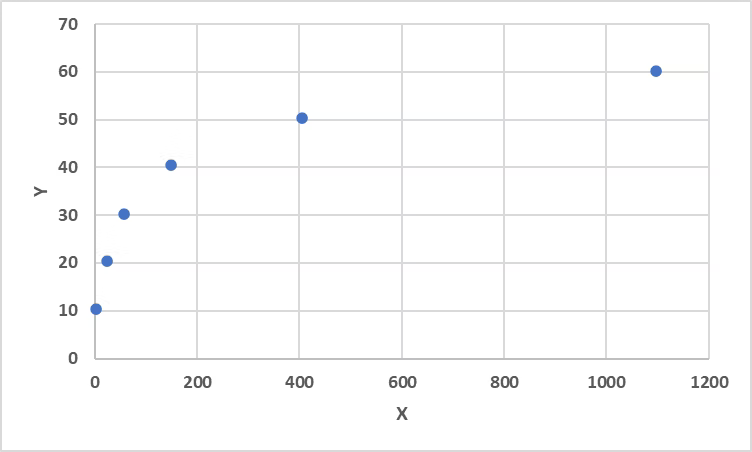




Figure 5 is a scatter plot for two variables, $X$ and $Y$. We can see $X$ and $Y$ don't have a linear relationship in the plot.

Another assumption in many financial models to consider is whether a **variable is normally distributed**. Suppose one of the assumptions for a financial model is to required variable Y to be normally distributed. We can draw a histogram for the variable and see if the histogram shows a bell-shaped pattern. Figure 6 shows three histograms for three different Y distributions.

**Figure 6: Histograms with Different Distributions**


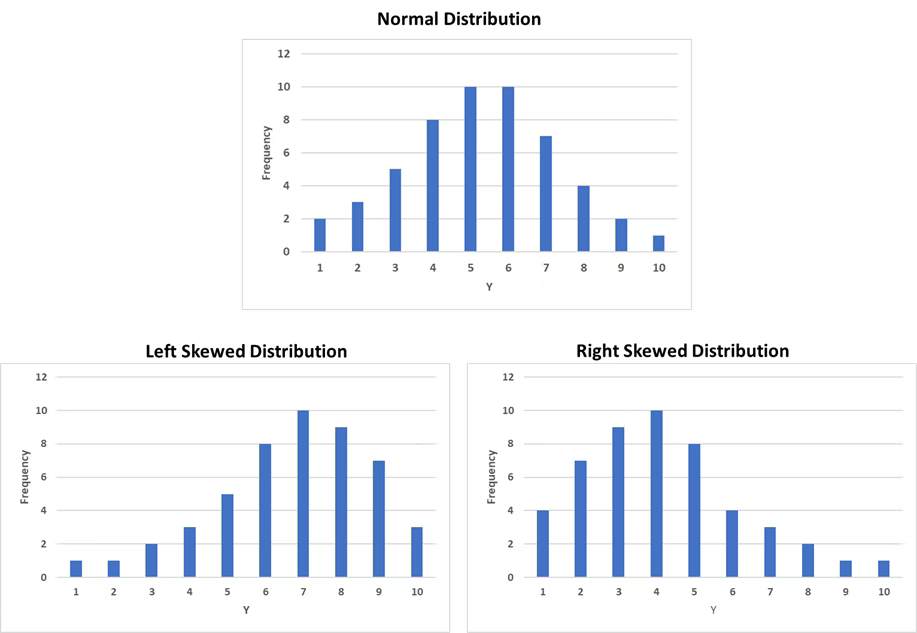



### **3.3 Methods to Transform Variables**

**Method 1: Transformation for Linear Relationship**

**If one assumption of a model requires variables to be linearly dependent but this relationship doesn't exist, we need to transform the variables** so that the linear relationship is present. The methods to try are **log transformation, square root transformation, or cube root transformation**. These methods have **two things in common**:

* They **preserve the order of the data points**
* They **"tame" outliers** by **making them less extreme**. Note the change in the scales between the two graphs.

Following up from the example in Figure 5, we can do a log transformation on $X$. In Figure 7, we can see the original scatter plot from Figure 5 on the left and the transformed $X$ in the scatter plot on the right. You can see that there is a linear relationship between $Y$ and $\ln(X)$.

**Figure 7: Pre-Transformation Scatter Plot vs. Post-Transformation Scatter Plot**


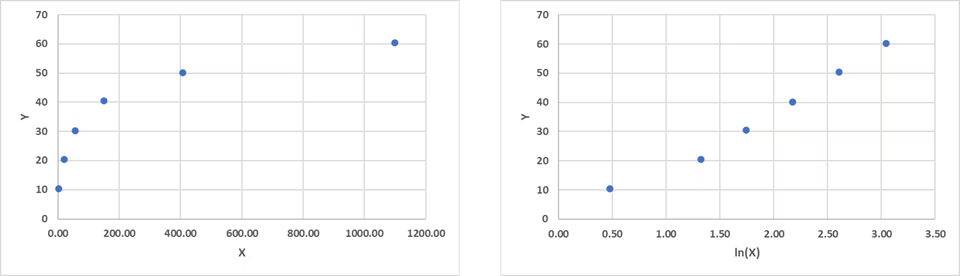


Sometimes, you may need to transform both 𝑋 and 𝑌 to obtain the linear relationship for the two variables. **Variable transformation is a trial and error process**. Based on your model assumptions, you will need to try to either transform one variable or two or even more to achieve your modeling goal.

**Method 2: Transformation for Normal Distribution**

When a model requires a variable to be normally distributed but the variable does not meet the assumption, we need to transform this variable to be normally distributed. We can use log transformation, square root transformation, or cube root transformation to get the result. One more thing to consider is the outliers for a non-normal variable with skewed distribution. If you **drop the outliers** on the tail, it may bring the variable back to normal distribution.

Another method to consider is the **Box and Cox method**. Box and Cox method is a variable transformation method that can transform a non-normally distributed variable to a normally distributed variable. Assume we have a variable $Y$ which is not normally distributed. The Box and Cox method will try to find a $\lambda$ satisfying the following rules and converting $Y$ to a normally distributed variable.

$$
\text{new} Y = \begin{cases}
  \frac{ (Y^{\lambda} - 1)}{\lambda },  & \ \text{ if }  \lambda \neq 0 \\
  \log(Y),  &  \ \text{ if } \lambda = 0
\end{cases} $$

**Box and Cox Method Transformation**

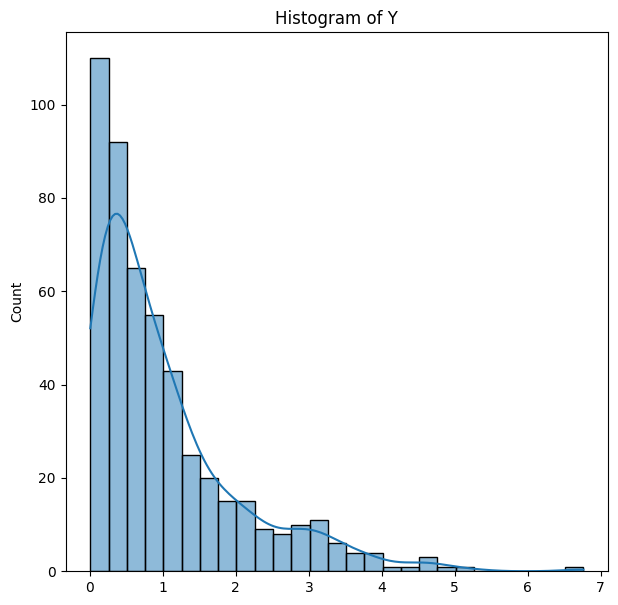

In [ ]:
# Generate random dataset
np.random.seed(0)  # to make reproducible example
Y = np.random.exponential(size=500)

# Plot distribution of data
plt.figure(figsize=(7, 7))
plt.title("Histogram of Y")
sns.histplot(Y, kde=True)
plt.show()

Optimal Box-Cox transformation lambda: 0.23254412692733537


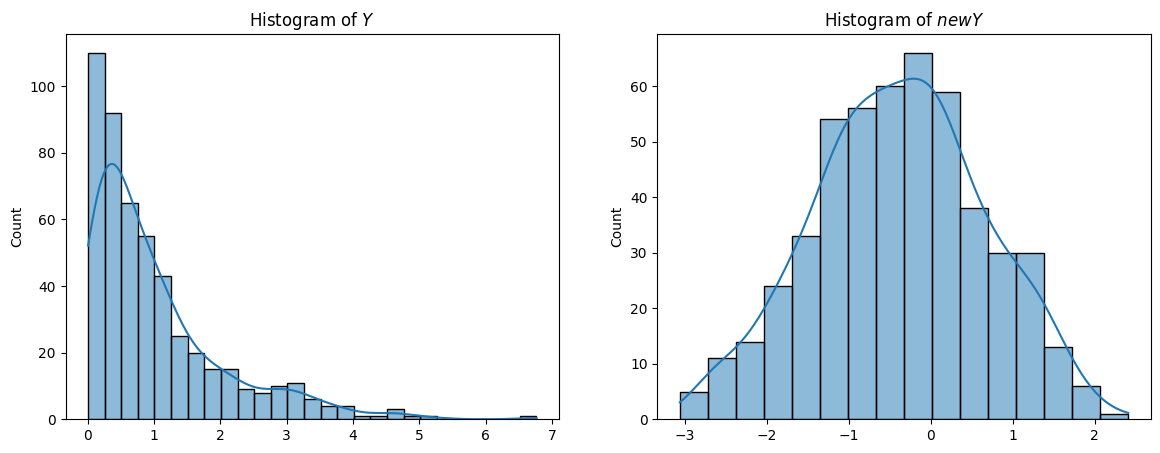

In [ ]:
# Apply Box-Cox transformation on original data
new_Y, best_lambda = boxcox(Y)
print("Optimal Box-Cox transformation lambda:", best_lambda)

# Plot distributions of original data
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(121)
sns.histplot(Y, kde=True, ax=ax1)
plt.title("Histogram of $Y$")

# Plot distribution of transformed data
ax2 = plt.subplot(122)
sns.histplot(new_Y, kde=True, ax=ax2)
plt.title("Histogram of $newY$")
plt.show()

The figure above shows us the histogram of our original variable $Y$ on the left and the histogram of the transformed variable $Y$ using the Box and Cox method on the right. We can see from the figure that the original variable $Y$ is right skewed. With Box and Cox transformation, the new variable is normally distributed.

### **3.4 Concluding Words for Variable Transformation**

**Variable transformation is both an art and a science**. Oftentimes, we need to draw a scatter plot and/or histogram to check the variables. Then, we apply different transformations to the variable. We use the transformed variable in the regression model and check the coefficient significance and model fit. If one transformation doesn't work, we try another transformation. It's an **iterative process** until the regression model result is good.

## **4. Conclusion**

In this lesson, we first introduced principal component analysis. We explained what principal components are and demonstrated the derivation of principal components. We then learned how to use the information obtained from principal component analysis to rerun a regression model to mitigate the multicollinearity issue.

The second topic we discussed in this lesson is variable transformation. We showed that when the dependent variable and independent variables are not linearly related, we need to transform independent variables to make sure a linear relationship exists to run a regression model. We also showed what to do when we need to convert a non-normally distributed variable to a normally distributed one.